In [ ]:
# 형태소 분석기 Mecab 설치
!git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git
%cd Mecab-ko-for-Google-Colab
!bash install_mecab-ko_on_colab190912.sh

Cloning into 'Mecab-ko-for-Google-Colab'...
remote: Enumerating objects: 115, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 115 (delta 11), reused 10 (delta 3), pack-reused 91
Receiving objects: 100% (115/115), 1.27 MiB | 4.52 MiB/s, done.
Resolving deltas: 100% (50/50), done.
/content/Mecab-ko-for-Google-Colab
Installing konlpy.....
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.4 MB 11.6 MB/s 
     |████████████████████████████████| 453 kB 39.5 MB/s 
Done
Installing mecab-0.996-ko-0.9.2.tar.gz.....
from https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
--2022-09-22 10:39:05--  https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
Resolving bitbucket.org (bitbucket.org)... 104.192.141.1, 2406:da00:ff00::22c0:3470, 2406:da00:ff00::6b17:d1f5, ...
Connecting to bitbucket.org (b

라이브러리 불러오기

In [ ]:
import pandas as pd
from konlpy.tag import Mecab
from gensim.models.doc2vec import TaggedDocument
from tqdm import tqdm

import warnings
warnings.filterwarnings(action='ignore')

ModuleNotFoundError: ignored

In [3]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# # 구글드라이브 csv 공유파일 불러오기
# import pandas as pd
# url="https://drive.google.com/file/d/1d2Fin3Op2M7ysVub9Gsfyt6qE6jmRDX7/view?usp=sharing" #구글드라이브 csv파일 이미지 주소
# path='https://drive.google.com/uc?id='+url.split('/')[-2]
# print("▶ 공유파일 링크변환 경로명 : ", path)
# df=pd.read_csv(path)
# df.head()

자소서데이터 로드 / 전처리

자소서 질문유형  
0 : 지원동기/입사후 포부 <br>
1 : 경험<br>
2: 성장과정<br>
3: 직무<br>
4:성격 장단점<br> 
5:사회 이슈<br>
6:기타 <br>


In [ ]:
df =pd.read_csv('/content/drive/MyDrive/4조/Raw_data/자소서 데이터/final_list_qtype.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18453 entries, 0 to 18452
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   corp_nm       18407 non-null  object 
 1   job           17308 non-null  object 
 2   recruit_date  17378 non-null  float64
 3   new_or_exp    6830 non-null   object 
 4   q1            18373 non-null  object 
 5   a1            18451 non-null  object 
 6   q2            13630 non-null  object 
 7   a2            13622 non-null  object 
 8   q3            11743 non-null  object 
 9   a3            11744 non-null  object 
 10  q4            7547 non-null   object 
 11  a4            7558 non-null   object 
 12  q5            3940 non-null   object 
 13  a5            3951 non-null   object 
 14  q1_type       18374 non-null  float64
 15  q2_type       13621 non-null  float64
 16  q3_type       11738 non-null  float64
 17  q4_type       7547 non-null   float64
 18  q5_type       3940 non-nul

In [ ]:
df.reset_index(inplace=True)

In [ ]:
df.columns

Index(['index', 'corp_nm', 'job', 'recruit_date', 'new_or_exp', 'q1', 'a1',
       'q2', 'a2', 'q3', 'a3', 'q4', 'a4', 'q5', 'a5', 'q1_type', 'q2_type',
       'q3_type', 'q4_type', 'q5_type'],
      dtype='object')

In [ ]:
df.isnull().values.any()

True

In [ ]:
df.fillna('자료없음', inplace=True)

In [ ]:
df.replace({'q1_type':'자료없음', 'q2_type':'자료없음', 'q3_type':'자료없음',
       'q4_type':'자료없음', 'q5_type':'자료없음'},100, inplace=True)

In [ ]:
df = df.astype({'q1_type':'int' , 'q2_type':'int', 'q3_type':'int','q4_type':'int', 'q5_type':'int'})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18453 entries, 0 to 18452
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   index         18453 non-null  int64 
 1   corp_nm       18453 non-null  object
 2   job           18453 non-null  object
 3   recruit_date  18453 non-null  object
 4   new_or_exp    18453 non-null  object
 5   q1            18453 non-null  object
 6   a1            18453 non-null  object
 7   q2            18453 non-null  object
 8   a2            18453 non-null  object
 9   q3            18453 non-null  object
 10  a3            18453 non-null  object
 11  q4            18453 non-null  object
 12  a4            18453 non-null  object
 13  q5            18453 non-null  object
 14  a5            18453 non-null  object
 15  q1_type       18453 non-null  int64 
 16  q2_type       18453 non-null  int64 
 17  q3_type       18453 non-null  int64 
 18  q4_type       18453 non-null  int64 
 19  q5_t

In [ ]:
df

,index,corp_nm,job,recruit_date,new_or_exp,q1,a1,q2,a2,q3,a3,q4,a4,q5,a5,q1_type,q2_type,q3_type,q4_type,q5_type
0,0,자료없음,자료없음,201610.0,자료없음,당신의 성장과정에 대해 기술하시오,500내외 저는 목표와 계획을 바탕으로 그 일을 끝까지 밀고 나가는 추진력을 몸...,코오롱에 지원하게 된 동기와 지원한 분야를 위해 어떤 노력과 준비를 해왔는지 기술하시오,"“실속 있다”라는 말이 있습니다 이 말은 겉모습만을 보고 판단하는 것이 아니라, 그...","아래의 단어를 기준으로 당신의 성격을 점수로 표현하고, 성격의 장단점에 대해 간략히...",제 성격의 가장 큰 장점은 매사에 긍정적인 태도에 임한다는 것입니다. 저는 긍정적인...,자료없음,자료없음,자료없음,자료없음,2,1,4,100,100
1,1,자료없음,연구개발,202011.0,자료없음,삼성전자판매를 지원한 동기 및 입사 후 이루고 싶은 꿈을 기술하시기 바랍니다,[결국은 삼성전자] 대한민국 국민들은 전자제품 회사 선택의 폭이 넓은 행운을 갖고 ...,최근 사회이슈 중 중요하다고 생각되는 한 가지를 선택하고 이에 관한 자신의 견해를 ...,[코로나19 이슈로 보는 자유민주주의의 딜레마] 코로나19 이슈에서 자유민주주의의 ...,자료없음,자료없음,자료없음,자료없음,자료없음,자료없음,0,5,100,100,100
2,2,자료없음,자료없음,202011.0,자료없음,인성 및 성격의 장단점,저는 목표를 위한 계획을 단계적으로 수립하고 실천하는 성격입니다. 차례대로 계획한 ...,지원동기 및 입사 후 포부,최근 친환경 에너지를 향한 관심이 급증하고 있습니다. 이에 따라 전기자동차에 관한 ...,학교생활 및 특별활동 경험,"해외연수, 봉사활동, 입상경험, 단체활동 등) (500자) 저는 대학교 1학년 때부...",전공 관련 주요 관심분야 및 논문소개,저는 고분자 물질을 설계하고 합성하여 실용적인 제품을 만드는 데 관심이 많습니다. ...,자료없음,자료없음,4,0,3,6,100
3,3,자료없음,자료없음,201610.0,자료없음,자신의 성장과정과 학창시절을 기술하여 주십시오,"[외향적인 아이, 소통을 배움으로 성장하다.]학창 시절의 저는 털털하고, 사람들에게...",지원 직무 관련 자신이 갖춘 역량에 대하여 구체적으로 기술하여 주십시오,"[성실함, 그것은 가장 큰 무기]현재 저는 석사과정 학생으로, 실험실에서 실험을 하...",지원 사업부 또는 직무에 지원하게 된 동기와 본인이 지원하는 사업부의 시장 경쟁력을...,"[고분자 중합의 선도자 '효성기술원', 그리고 미래]제가 효성기술원에 지원하게 된 ...",자료없음,자료없음,자료없음,자료없음,2,3,0,100,100
4,4,자료없음,자료없음,201510.0,자료없음,지원동기,"다양한 유통업 현장에서 나를 발견하다] 400자군 제대후, 대형마트 계산원, 핸드폰...",성장과정 400자,쇼핑몰 창업경험]예전의 저는 평소 새로운 일에 도전하는걸 두려워 했던 학생이었습니다...,입사후 포부 400자,고객의 마음을 읽는 영업인재]다양한 서비스직 아르바이트를 통해 사람의 마음을 헤아리...,성격의 장단점 및 보완노력,Yes man]늘 누구에게나 좋은 사람으로 비춰지고 싶은 욕심에 주변 분들의 부탁에...,정직함에 대하여,진솔함을 통한 정직함] 대학생활중 항상 많은 과제와 잦은 수업보충으로 인해 수강생들...,0,2,0,4,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18448,18448,오비맥주,유통·물류·재고,201503.0,인턴,성장과정,저는 어린 시절 농구를 좋아해 농구화를 사고 싶어 아르바이트를 했습니다. 큰 돈은 ...,성격의 장단점,저의 장점은 성실함과 유연한 대응 능력입니다. 대학에 입학하고 성인이 되어 내 생활...,지원동기,"능력을 갖춘 유통, 물류 전문가가 되기 위하여 OB맥주에서의 경험은 저에게 중요한 ...",입사 후 포부,OB 맥주는 우리나라 주류유통을 선도하고 더 나아가 세계최대맥주그룹인 AB인브베와 ...,자료없음,자료없음,2,4,0,0,100
18449,18449,삼화페인트공업,화학·에너지·환경,201603.0,신입,"본인의 성격, 성장과정, 가치관 등을 기술하시오.","남들을 배려하며 착하게 사는 것이 옳다고 배우며 살아왔기 때문에, 이타적인 성향이 ...",본인 해당직무를 지원한 동기 및 이를 위해 준비해온 과정을 기술하시오.,"개발된 제품 소재들의 물성(효율), 생산성 등을 개선하는 등의 연구개발에 참여하고 ...",삼화페인트 인재상 중 자신과 근접한 항목과 향후 보완이 필요한 항목에 대해 구체적으...,"맡겨진 업무를 반드시 해결하고, 끊임없이 보완할 점을 찾는 점입니다. 석사로 입학하...",삼화페인트에 지원한 동기와 향후 목표에 대해 기술하시오.,석사과정에서 현장실습 견학으로 삼화페인트 연구소에 다녀간 후로 관심을 갖게 되었습니...,자료없음,자료없음,2,0,4,0,100
18450,18450,LG디스플레이,생산관리·공정관리·품질관리,201509.0,신입,LG디스플레이 및 지원 직무에 지원하는 동기에 대해 기술해 주십시오. (500~10...,"2013년 여름, 천호식품에서 아르바이트를 했었습니다. 제품 생산에서부터 포장, 운...",도전적인 목표를 정하고 열정적으로 일을 추진했던 경험을 구체적으로 기술해 주십시오....,[실패로서 얻는 경험] `창업 지원 공모전`에 참가했습니다. 4번의 심사를 통과하면...,디스플레이 및 지원 직무 관련된 이력을 간결하게 나열해주시기 바랍니다. (100 ~...,공학윤리(2010) / B+ 기계공작법(2013) / B+ 기계공작법실습(2014)...,자료없음,자료없음,자료없음,자료없음,0,1,0,100,100
18451,18451,엘에스전선,생산·제조·설비·조립,201509.0,신입,"본인에 대하여 소개해 주시기 바랍니다. (성장과정, 경험, 성격, 강/약점, 가치관...",[노력하는 인재] 선배들의 추천을 받아 13년도 동아리 회장을 맡았습니다. 당시 숫...,"본인이 속했던 조직(ex. 친구, 동아리, 가족, 기타모임 등)의 화합과 융화를 이...",[`무엇인가`를 배웠습니다] 봉사활동을 처음 시작할 당시 봉사시간보다는 누군가를 만...,"본인 스스로 최고가 되기 위해 노력했던 경험에 대해서 작성해 주시고, 당사 지원 직...",[To be the best? To do my best!!] 가장 높은 자리에 올라...,"누군가를 감동시키기 위해 노력했던 경험과, 그러한 노력이 상대방에게 어떻게 받아들여...","[함께한다는 것, 그 이상의 의미] 대학생활을 함께한 모임, 새앎터가 있습니다. 환...",자료없음,자료없음,2,2,3,1,100


In [ ]:
df['q1_type']

0        2
1        0
2        4
3        2
4        0
        ..
18448    2
18449    2
18450    0
18451    2
18452    0
Name: q1_type, Length: 18453, dtype: int64

In [ ]:
# 자소서 항목중 지원  
condition = (df.q1_type == 0)
condition2 = (df.q2_type == 0)
condition3 = (df.q3_type == 0)
condition4 = (df.q4_type == 0)
condition5 = (df.q5_type == 0)

df_jiwon1=df[condition]
df_jiwon2=df[condition2]
df_jiwon3=df[condition3]
df_jiwon4=df[condition4]
df_jiwon5=df[condition5]
df_jiwon1=df_jiwon1[['index','corp_nm','job','recruit_date','new_or_exp','a1']]
df_jiwon1.rename(columns={'a1':'jiwon'}, inplace=True)
df_jiwon2=df_jiwon2[['index','corp_nm','job','recruit_date','new_or_exp','a2']]
df_jiwon2.rename(columns={'a2':'jiwon'}, inplace=True)
df_jiwon3=df_jiwon3[['index','corp_nm','job','recruit_date','new_or_exp','a3']]
df_jiwon3.rename(columns={'a3':'jiwon'}, inplace=True)
df_jiwon4=df_jiwon4[['index','corp_nm','job','recruit_date','new_or_exp','a4']]
df_jiwon4.rename(columns={'a4':'jiwon'}, inplace=True)
df_jiwon5=df_jiwon5[['index','corp_nm','job','recruit_date','new_or_exp','a5']]
df_jiwon5.rename(columns={'a5':'jiwon'}, inplace=True)
df_jiwon=pd.concat([df_jiwon1, df_jiwon2,df_jiwon3,df_jiwon4,df_jiwon5])
# df_jiwon.set_index('index', inplace=True)
# print(df_jiwon)

# 자소서 항목중 경험 
condition = (df.q1_type == 1)
condition2 = (df.q2_type == 1)
condition3 = (df.q3_type == 1)
condition4 = (df.q4_type == 1)
condition5 = (df.q5_type == 1)

df_exp1=df[condition]
df_exp2=df[condition2]
df_exp3=df[condition3]
df_exp4=df[condition4]
df_exp5=df[condition5]
df_exp1=df_exp1[['index','corp_nm','job','recruit_date','new_or_exp','a1']]
df_exp1.rename(columns={'a1':'exp'}, inplace=True)
df_exp2=df_exp2[['index','corp_nm','job','recruit_date','new_or_exp','a2']]
df_exp2.rename(columns={'a2':'exp'}, inplace=True)
df_exp3=df_exp3[['index','corp_nm','job','recruit_date','new_or_exp','a3']]
df_exp3.rename(columns={'a3':'exp'}, inplace=True)
df_exp4=df_exp4[['index','corp_nm','job','recruit_date','new_or_exp','a4']]
df_exp4.rename(columns={'a4':'exp'}, inplace=True)
df_exp5=df_exp5[['index','corp_nm','job','recruit_date','new_or_exp','a5']]
df_exp5.rename(columns={'a5':'exp'}, inplace=True)
df_exp=pd.concat([df_exp1, df_exp2,df_exp3,df_exp4,df_exp5])
# df_exp.set_index('index', inplace=True)
# print(df_exp)

# 자소서 항목중 성장
condition = (df.q1_type == 2)
condition2 = (df.q2_type == 2)
condition3 = (df.q3_type == 2)
condition4 = (df.q4_type == 2)
condition5 = (df.q5_type == 2)

df_grow1=df[condition]
df_grow2=df[condition2]
df_grow3=df[condition3]
df_grow4=df[condition4]
df_grow5=df[condition5]
df_grow1=df_grow1[['index','corp_nm','job','recruit_date','new_or_exp','a1']]
df_grow1.rename(columns={'a1':'grow'}, inplace=True)
df_grow2=df_grow2[['index','corp_nm','job','recruit_date','new_or_exp','a2']]
df_grow2.rename(columns={'a2':'grow'}, inplace=True)
df_grow3=df_grow3[['index','corp_nm','job','recruit_date','new_or_exp','a3']]
df_grow3.rename(columns={'a3':'grow'}, inplace=True)
df_grow4=df_grow4[['index','corp_nm','job','recruit_date','new_or_exp','a4']]
df_grow4.rename(columns={'a4':'grow'}, inplace=True)
df_grow5=df_grow5[['index','corp_nm','job','recruit_date','new_or_exp','a5']]
df_grow5.rename(columns={'a5':'grow'}, inplace=True)
df_grow=pd.concat([df_grow1, df_grow2,df_grow3,df_grow4,df_grow5])
# df_grow.set_index('index', inplace=True)
# # print(df_grow)

# 자소서 항목중 직무
condition = (df.q1_type == 3)
condition2 = (df.q2_type == 3)
condition3 = (df.q3_type ==3)
condition4 = (df.q4_type == 3)
condition5 = (df.q5_type == 3)

df_duty1=df[condition]
df_duty2=df[condition2]
df_duty3=df[condition3]
df_duty4=df[condition4]
df_duty5=df[condition5]
df_duty1=df_duty1[['index','corp_nm','job','recruit_date','new_or_exp','a1']]
df_duty1.rename(columns={'a1':'duty'}, inplace=True)
df_duty2=df_duty2[['index','corp_nm','job','recruit_date','new_or_exp','a2']]
df_duty2.rename(columns={'a2':'duty'}, inplace=True)
df_duty3=df_duty3[['index','corp_nm','job','recruit_date','new_or_exp','a3']]
df_duty3.rename(columns={'a3':'duty'}, inplace=True)
df_duty4=df_duty4[['index','corp_nm','job','recruit_date','new_or_exp','a4']]
df_duty4.rename(columns={'a4':'duty'}, inplace=True)
df_duty5=df_duty5[['index','corp_nm','job','recruit_date','new_or_exp','a5']]
df_duty5.rename(columns={'a5':'duty'}, inplace=True)
df_duty=pd.concat([df_duty1, df_duty2,df_duty3,df_duty4,df_duty5])
# df_duty.set_index('index', inplace=True)
# print(df_duty)

# 자소서 항목중 성격 장단점
condition = (df.q1_type == 4)
condition2 = (df.q2_type == 4)
condition3 = (df.q3_type == 4)
condition4 = (df.q4_type == 4)
condition5 = (df.q5_type == 4)

df_cha1=df[condition]
df_cha2=df[condition2]
df_cha3=df[condition3]
df_cha4=df[condition4]
df_cha5=df[condition5]
df_cha1=df_cha1[['index','corp_nm','job','recruit_date','new_or_exp','a1']]
df_cha1.rename(columns={'a1':'cha'}, inplace=True)
df_cha2=df_cha2[['index','corp_nm','job','recruit_date','new_or_exp','a2']]
df_cha2.rename(columns={'a2':'cha'}, inplace=True)
df_cha3=df_cha3[['index','corp_nm','job','recruit_date','new_or_exp','a3']]
df_cha3.rename(columns={'a3':'cha'}, inplace=True)
df_cha4=df_cha4[['index','corp_nm','job','recruit_date','new_or_exp','a4']]
df_cha4.rename(columns={'a4':'cha'}, inplace=True)
df_cha5=df_cha5[['index','corp_nm','job','recruit_date','new_or_exp','a5']]
df_cha5.rename(columns={'a5':'cha'}, inplace=True)
df_cha=pd.concat([df_cha1, df_cha2,df_cha3,df_cha4,df_cha5])
# df_cha.set_index('index', inplace=True)
# print(df_cha)

# 자소서 항목중 이슈
condition = (df.q1_type == 5)
condition2 = (df.q2_type == 5)
condition3 = (df.q3_type == 5)
condition4 = (df.q4_type == 5)
condition5 = (df.q5_type == 5)

df_iss1=df[condition]
df_iss2=df[condition2]
df_iss3=df[condition3]
df_iss4=df[condition4]
df_iss5=df[condition5]
df_iss1=df_iss1[['index','corp_nm','job','recruit_date','new_or_exp','a1']]
df_iss1.rename(columns={'a1':'iss'}, inplace=True)
df_iss2=df_iss2[['index','corp_nm','job','recruit_date','new_or_exp','a2']]
df_iss2.rename(columns={'a2':'iss'}, inplace=True)
df_iss3=df_iss3[['index','corp_nm','job','recruit_date','new_or_exp','a3']]
df_iss3.rename(columns={'a3':'iss'}, inplace=True)
df_iss4=df_iss4[['index','corp_nm','job','recruit_date','new_or_exp','a4']]
df_iss4.rename(columns={'a4':'iss'}, inplace=True)
df_iss5=df_iss5[['index','corp_nm','job','recruit_date','new_or_exp','a5']]
df_iss5.rename(columns={'a5':'iss'}, inplace=True)
df_iss=pd.concat([df_iss1, df_iss2, df_iss3,df_iss4,df_iss5])
# df_iss.set_index('index', inplace=True)
# print(df_iss)

# 자소서 항목중 기타
condition = (df.q1_type == 6)
condition2 = (df.q2_type == 6)
condition3 = (df.q3_type == 6)
condition4 = (df.q4_type == 6)
condition5 = (df.q5_type == 6)

df_etc1=df[condition]
df_etc2=df[condition2]
df_etc3=df[condition3]
df_etc4=df[condition4]
df_etc5=df[condition5]
df_etc1=df_etc1[['index','corp_nm','job','recruit_date','new_or_exp','a1']]
df_etc1.rename(columns={'a1':'etc'}, inplace=True)
df_etc2=df_etc2[['index','corp_nm','job','recruit_date','new_or_exp','a2']]
df_etc2.rename(columns={'a2':'etc'}, inplace=True)
df_etc3=df_etc3[['index','corp_nm','job','recruit_date','new_or_exp','a3']]
df_etc3.rename(columns={'a3':'etc'}, inplace=True)
df_etc4=df_etc4[['index','corp_nm','job','recruit_date','new_or_exp','a4']]
df_etc4.rename(columns={'a4':'etc'}, inplace=True)
df_etc5=df_etc5[['index','corp_nm','job','recruit_date','new_or_exp','a5']]
df_etc5.rename(columns={'a5':'etc'}, inplace=True)
df_etc=pd.concat([df_etc1, df_etc2, df_etc3, df_etc4, df_etc5])
# df_etc.set_index('index', inplace=True)
# # print(df_etc)


In [ ]:
# 특문,숫자,영어 제거 중복값 제거
df_jiwon=df_jiwon.drop_duplicates(['jiwon'], keep=False)
df_jiwon['jiwon']=df_jiwon['jiwon'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
df_exp=df_exp.drop_duplicates(['exp'], keep=False)
df_exp['exp']=df_exp['exp'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
df_grow=df_grow.drop_duplicates(['grow'], keep=False)
df_grow['grow']=df_grow['grow'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
df_duty=df_duty.drop_duplicates(['duty'], keep=False)
df_duty['duty']=df_duty['duty'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
df_cha=df_cha.drop_duplicates(['cha'], keep=False)
df_cha['cha']=df_cha['cha'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
df_iss=df_iss.drop_duplicates(['iss'], keep=False)
df_iss['iss']=df_iss['iss'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
df_etc=df_etc.drop_duplicates(['etc'], keep=False)
df_etc['etc']=df_etc['etc'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: The default value of regex will change from True to False in a future version.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the do

In [ ]:
df_total=pd.merge(df_jiwon, df_exp,how='outer')


In [ ]:
df_total1=pd.merge(df_grow,df_duty, how='outer')
df_total2=pd.merge(df_cha,df_iss, how='outer')


In [ ]:
df_total3=pd.merge(df_total2,df_etc , how='outer')

In [ ]:
df_total=pd.merge(df_total, df_total1 ,how='outer')

In [ ]:
df_total=pd.merge(df_total,df_total3,how='outer')

In [ ]:
df_total.fillna('자료없음',inplace=True)

In [ ]:
df_total.columns

Index(['index', 'corp_nm', 'job', 'recruit_date', 'new_or_exp', 'jiwon', 'exp',
       'grow', 'duty', 'cha', 'iss', 'etc'],
      dtype='object')

In [ ]:
df_total.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
32546    False
32547    False
32548    False
32549    False
32550    False
Length: 32551, dtype: bool

In [ ]:
df_total.drop_duplicates()

,index,corp_nm,job,recruit_date,new_or_exp,jiwon,exp,grow,duty,cha,iss,etc
0,1,자료없음,연구개발,202011.0,자료없음,결국은 삼성전자 대한민국 국민들은 전자제품 회사 선택의 폭이 넓은 행운을 갖고 있습...,자료없음,자료없음,자료없음,자료없음,코로나 이슈로 보는 자유민주주의의 딜레마 코로나 이슈에서 자유민주주의의 한계를 쉽게...,자료없음
1,4,자료없음,자료없음,201510.0,자료없음,다양한 유통업 현장에서 나를 발견하다 자군 제대후 대형마트 계산원 핸드폰 판매 의류...,자료없음,쇼핑몰 창업경험예전의 저는 평소 새로운 일에 도전하는걸 두려워 했던 학생이었습니다 ...,자료없음,늘 누구에게나 좋은 사람으로 비춰지고 싶은 욕심에 주변 분들의 부탁에 늘 로 대답...,자료없음,진솔함을 통한 정직함 대학생활중 항상 많은 과제와 잦은 수업보충으로 인해 수강생들이...
2,4,자료없음,자료없음,201510.0,자료없음,고객의 마음을 읽는 영업인재다양한 서비스직 아르바이트를 통해 사람의 마음을 헤아리는...,자료없음,쇼핑몰 창업경험예전의 저는 평소 새로운 일에 도전하는걸 두려워 했던 학생이었습니다 ...,자료없음,늘 누구에게나 좋은 사람으로 비춰지고 싶은 욕심에 주변 분들의 부탁에 늘 로 대답...,자료없음,진솔함을 통한 정직함 대학생활중 항상 많은 과제와 잦은 수업보충으로 인해 수강생들이...
3,12,자료없음,자료없음,201709.0,자료없음,안전제일 세상 어느 공장을 가도 이 같은 문구가 안 붙어있는 곳을 찾기는 힘들 ...,자료없음,자료없음,자료없음,자료없음,자료없음,자료없음
4,24,자료없음,자료없음,201810.0,자료없음,저는 스위스라는 나라를 좋아합니다 루체른 지역에 여행을 갔을 때 정교한 교량에 제작...,자료없음,자료없음,토목사업이라함은 기초공사를 하고 설계시공을 거쳐 유지관리까지 모든 과정을 말합니다 ...,자료없음,최근 가장 관심있는 이슈는 라오스 댐 붕괴 사고입니다월 일 라오스 남동부 아타프주에...,일을 진행할 때 구성원들 간의 소통과 세부적인 역할분담이 중요하다고 생각합니다저는 ...
...,...,...,...,...,...,...,...,...,...,...,...,...
32546,228,이랜드,자료없음,201510.0,자료없음,자료없음,자료없음,자료없음,자료없음,자료없음,자료없음,인터넷주소 이유 어라운지 커피에 관한 모든 것을 경험할 수 있는 곳으로 최신 트...
32547,14072,커피빈코리아,인사·노무·교육,201503.0,신입,자료없음,자료없음,자료없음,자료없음,자료없음,자료없음,아동복지센터에서 실습하면서 굉장히 다양한 업무를 맡아 수행하였습니다 교육청에 인계된...
32548,2230,F&F,디스커버리 마케팅팀,202203.0,자료없음,자료없음,자료없음,자료없음,자료없음,자료없음,자료없음,학기 학회원 패션 산업 분석 및 마케팅 기획안 발표 국내 정식 유통 경로...
32549,2230,F&F,디스커버리 마케팅팀,202203.0,자료없음,자료없음,자료없음,자료없음,자료없음,자료없음,자료없음,패션 유형 검사 기획 및 제작 경과 가지 패션 스타일 유형 기획 설명 ...


In [ ]:
df_total

,index,corp_nm,job,recruit_date,new_or_exp,jiwon,exp,grow,duty,cha,iss,etc
0,1,자료없음,연구개발,202011.0,자료없음,결국은 삼성전자 대한민국 국민들은 전자제품 회사 선택의 폭이 넓은 행운을 갖고 있습...,NaN,NaN,NaN,NaN,코로나 이슈로 보는 자유민주주의의 딜레마 코로나 이슈에서 자유민주주의의 한계를 쉽게...,NaN
1,4,자료없음,자료없음,201510.0,자료없음,다양한 유통업 현장에서 나를 발견하다 자군 제대후 대형마트 계산원 핸드폰 판매 의류...,NaN,쇼핑몰 창업경험예전의 저는 평소 새로운 일에 도전하는걸 두려워 했던 학생이었습니다 ...,NaN,늘 누구에게나 좋은 사람으로 비춰지고 싶은 욕심에 주변 분들의 부탁에 늘 로 대답...,NaN,진솔함을 통한 정직함 대학생활중 항상 많은 과제와 잦은 수업보충으로 인해 수강생들이...
2,4,자료없음,자료없음,201510.0,자료없음,고객의 마음을 읽는 영업인재다양한 서비스직 아르바이트를 통해 사람의 마음을 헤아리는...,NaN,쇼핑몰 창업경험예전의 저는 평소 새로운 일에 도전하는걸 두려워 했던 학생이었습니다 ...,NaN,늘 누구에게나 좋은 사람으로 비춰지고 싶은 욕심에 주변 분들의 부탁에 늘 로 대답...,NaN,진솔함을 통한 정직함 대학생활중 항상 많은 과제와 잦은 수업보충으로 인해 수강생들이...
3,12,자료없음,자료없음,201709.0,자료없음,안전제일 세상 어느 공장을 가도 이 같은 문구가 안 붙어있는 곳을 찾기는 힘들 ...,NaN,NaN,NaN,NaN,NaN,NaN
4,24,자료없음,자료없음,201810.0,자료없음,저는 스위스라는 나라를 좋아합니다 루체른 지역에 여행을 갔을 때 정교한 교량에 제작...,NaN,NaN,토목사업이라함은 기초공사를 하고 설계시공을 거쳐 유지관리까지 모든 과정을 말합니다 ...,NaN,최근 가장 관심있는 이슈는 라오스 댐 붕괴 사고입니다월 일 라오스 남동부 아타프주에...,일을 진행할 때 구성원들 간의 소통과 세부적인 역할분담이 중요하다고 생각합니다저는 ...
...,...,...,...,...,...,...,...,...,...,...,...,...
32546,228,이랜드,자료없음,201510.0,자료없음,NaN,NaN,NaN,NaN,NaN,NaN,인터넷주소 이유 어라운지 커피에 관한 모든 것을 경험할 수 있는 곳으로 최신 트...
32547,14072,커피빈코리아,인사·노무·교육,201503.0,신입,NaN,NaN,NaN,NaN,NaN,NaN,아동복지센터에서 실습하면서 굉장히 다양한 업무를 맡아 수행하였습니다 교육청에 인계된...
32548,2230,F&F,디스커버리 마케팅팀,202203.0,자료없음,NaN,NaN,NaN,NaN,NaN,NaN,학기 학회원 패션 산업 분석 및 마케팅 기획안 발표 국내 정식 유통 경로...
32549,2230,F&F,디스커버리 마케팅팀,202203.0,자료없음,NaN,NaN,NaN,NaN,NaN,NaN,패션 유형 검사 기획 및 제작 경과 가지 패션 스타일 유형 기획 설명 ...


In [ ]:
df_jiwon

,index,corp_nm,job,recruit_date,new_or_exp,jiwon
1,1,자료없음,연구개발,202011.0,자료없음,결국은 삼성전자 대한민국 국민들은 전자제품 회사 선택의 폭이 넓은 행운을 갖고 있습...
4,4,자료없음,자료없음,201510.0,자료없음,다양한 유통업 현장에서 나를 발견하다 자군 제대후 대형마트 계산원 핸드폰 판매 의류...
12,12,자료없음,자료없음,201709.0,자료없음,안전제일 세상 어느 공장을 가도 이 같은 문구가 안 붙어있는 곳을 찾기는 힘들 ...
24,24,자료없음,자료없음,201810.0,자료없음,저는 스위스라는 나라를 좋아합니다 루체른 지역에 여행을 갔을 때 정교한 교량에 제작...
28,28,자료없음,자료없음,201610.0,자료없음,추억을 선물하는 금호 터미널 쾌적한 환경과 다양한 즐길 거리가 있는 유스퀘어는 ...
...,...,...,...,...,...,...
18430,18430,아트박스,기획·전략·경영,201503.0,신입,혁신박스의 새로운 트렌드를 선도 팬시 제조업의 입지를 굳건히 지키고 있는 아트박스의...
18437,18437,한일홀딩스,생산관리·공정관리·품질관리,201603.0,신입,공기와 같은 기업 한일 시멘트를 집약적으로 표현할 수 있는 말입니다 고품질의 시멘트...
18443,18443,본푸드시스템,응용프로그래머,201509.0,인턴,동국제강이 유니온 스틸로 합병되는 신문 기사를 읽게되면서 귀하의 회사에 관심을 가지...
18445,18445,미원상사,생산관리·공정관리·품질관리,201509.0,신입,저는 미원상사에서 생산기술 엔지니어로서의 근무를 희망합니다 이 직무는 공정의 개선 ...


In [ ]:
df_total.to_csv('/content/drive/MyDrive/4조_Study/Word2Vec/data/total_cv.csv')

*Q1* 회사별 유사도를 확인하기위해 A1 분석

In [ ]:
mecab = Mecab()

tagged_corpus_list1 = []

for index, row in tqdm(df_jiwon.iterrows(), total=len(df_jiwon)):
  text = row['jiwon']
  tag = row['corp_nm']
  tagged_corpus_list1.append(TaggedDocument(tags=[tag], words=mecab.morphs(text)))

print('문서의 수 :', len(tagged_corpus_list1))

tagged_corpus_list2 = []

for index, row in tqdm(df_exp.iterrows(), total=len(df_exp)):
  text = row['exp']
  tag = row['corp_nm']
  tagged_corpus_list2.append(TaggedDocument(tags=[tag], words=mecab.morphs(text)))

print('문서의 수 :', len(tagged_corpus_list2))

tagged_corpus_list3 = []

for index, row in tqdm(df_grow.iterrows(), total=len(df_grow)):
  text = row['grow']
  tag = row['corp_nm']
  tagged_corpus_list3.append(TaggedDocument(tags=[tag], words=mecab.morphs(text)))

print('문서의 수 :', len(tagged_corpus_list3))

tagged_corpus_list4 = []

for index, row in tqdm(df_duty.iterrows(), total=len(df_duty)):
  text = row['duty']
  tag = row['corp_nm']
  tagged_corpus_list4.append(TaggedDocument(tags=[tag], words=mecab.morphs(text)))

print('문서의 수 :', len(tagged_corpus_list4))

tagged_corpus_list5 = []

for index, row in tqdm(df_cha.iterrows(), total=len(df_cha)):
  text = row['cha']
  tag = row['corp_nm']
  tagged_corpus_list5.append(TaggedDocument(tags=[tag], words=mecab.morphs(text)))

print('문서의 수 :', len(tagged_corpus_list5))

tagged_corpus_list6 = []

for index, row in tqdm(df_iss.iterrows(), total=len(df_iss)):
  text = row['iss']
  tag = row['corp_nm']
  tagged_corpus_list6.append(TaggedDocument(tags=[tag], words=mecab.morphs(text)))

print('문서의 수 :', len(tagged_corpus_list6))

tagged_corpus_list7 = []

for index, row in tqdm(df_etc.iterrows(), total=len(df_etc)):
  text = row['etc']
  tag = row['corp_nm']
  tagged_corpus_list7.append(TaggedDocument(tags=[tag], words=mecab.morphs(text)))

print('문서의 수 :', len(tagged_corpus_list7))

100%|██████████| 11113/11113 [00:28<00:00, 391.60it/s]


문서의 수 : 11113


100%|██████████| 16084/16084 [00:44<00:00, 365.30it/s]


문서의 수 : 16084


100%|██████████| 5681/5681 [00:16<00:00, 336.51it/s]


문서의 수 : 5681


100%|██████████| 5582/5582 [00:14<00:00, 388.58it/s]


문서의 수 : 5582


100%|██████████| 2957/2957 [00:06<00:00, 449.53it/s]


문서의 수 : 2957


100%|██████████| 2502/2502 [00:06<00:00, 359.67it/s]


문서의 수 : 2502


100%|██████████| 10676/10676 [00:26<00:00, 401.16it/s]

문서의 수 : 10676


첫번째 문서의 전처리 결과를 확인해봅시다.


In [ ]:
tagged_corpus_list1[0]

TaggedDocument(words=['결국', '은', '삼성전자', '대한민국', '국민', '들', '은', '전자', '제품', '회사', '선택', '의', '폭', '이', '넓', '은', '행운', '을', '갖', '고', '있', '습니다', '그리하여', '국민', '들', '은', '한', '회사', '의', '제품', '이', '아닌', '다른', '회사', '의', '제품', '을', '번갈', '아', '구매', '하', '기', '도', '합니다', '하지만', '결국', '은', '삼성전자', '로', '돌아오', '게', '되', '어', '있', '다고', '생각', '합니다', '삼성전자', '의', '제품', '은', '최고', '의', '품질', '과', '디자인', '을', '자랑', '하', '고', '이', '로', '인해', '신뢰', '성', '이', '높', '습니다', '가격', '이', '저렴', '한', '편', '은', '아니', '지만', '서비스', '품질', '브랜드', '가치', '를', '생각', '해', '보', '면', '합리', '적', '인', '가격', '이', '라', '생각', '합니다', '결국', '은', '삼성전자', '이', '기', '때문', '에', '지원', '하', '게', '되', '었', '습니다', '또한', '저', '는', '판매', '영업직', '에', '필요', '한', '역량', '인', '긍정', '적', '인', '사고', '의사소통', '능력', '고객', '지향', '적', '사고', '를', '가지', '고', '있', '습니다', '일본', '교환', '학생', '시절', '패스', '트리', '테일', '링', '의', '대형', '의류', '매장인', '에서', '개월', '간', '근무', '했었', '습니다', '이', '때', '저', '는', '외국인', '파트', '타이머', '최초', '이달', '의', '서비스', '왕', '

In [ ]:
tagged_corpus_list2[0]

TaggedDocument(words=['발명품', '작동', '오류', '를', '해결', '하', '며', '경험', '한', '원인', '파악', '의', '중요', '성', '학부', '시절', '에', '아두이노', '를', '활용', '하', '여', '움직이', '는', '발명품', '제작', '프로젝트', '를', '진행', '하', '며', '작동', '문제', '를', '해결', '한', '경험', '이', '있', '습니다', '교수', '님', '께서', '과제', '를', '공개', '하', '시', '면서', '아두이노', '는', '움직이', '는', '발명품', '은', '시현', '하', '는', '것', '은', '힘들', '것', '이', '다', '라고', '하', '시', '며', '움직이', '는', '발명품', '을', '제작', '하', '면', '가산점', '을', '주', '겠', '다고', '하', '셨', '습니다', '그래서', '저희', '팀', '은', '교수', '님', '의', '말씀', '에', '자극', '받', '아서', '움직이', '는', '발명품', '제작', '에', '도전', '했', '습니다', '저희', '팀', '은', '의류', '를', '자동', '으로', '개', '주', '는', '라는', '장치', '를', '만들', '기', '로', '했', '습니다', '장치', '위', '에', '옷', '을', '올려', '놓', '으면', '옷', '을', '개', '고', '차곡차곡', '쌓', '아', '주', '는', '발명품', '이', '었', '습니다', '모터', '의', '토크', '와', '옷', '의', '무게', '를', '계산', '하', '여', '토크', '가', '인', '서보모터', '개', '를', '이용', '하', '여', '발명품', '을', '제작', '하', '였', '습니다', '하지만', '중간', '성능', '테스트', '단계', '에서

In [ ]:
tagged_corpus_list3[0]

TaggedDocument(words=['내외', '저', '는', '목표', '와', '계획', '을', '바탕', '으로', '그', '일', '을', '끝', '까지', '밀', '고', '나가', '는', '추진력', '을', '몸소', '익히', '며', '자랐', '습니다', '일례', '로', '대학생', '때', '에', '는', '명', '이', '넘', '는', '학생', '들', '이', '참가', '하', '는', '오리엔테이션', '행사', '를', '기획', '해', '본', '경험', '이', '있', '습니다', '저', '는', '당시', '물자', '팀장', '으로서', '한정', '된', '예산', '을', '가지', '고', '필요', '한', '물품', '들', '을', '준비', '해야', '하', '였', '습니다', '저', '는', '팀원', '들', '과', '함께', '예상', '수요', '를', '파악', '해', '예산', '을', '짜', '고', '조금', '이', '라도', '더', '저렴', '하', '게', '구매', '하', '기', '위해', '도매상', '들', '을', '찾아다니', '며', '합리', '적', '인', '구매', '결정', '을', '하', '기', '위해', '노력', '하', '였', '습니다', '도매상', '들', '을', '물색', '하', '는', '과정', '에서', '단가', '만', '알아보', '러', '온', '것', '이', '냐며', '큰', '소리', '를', '듣', '기', '도', '하', '고', '큰', '단위', '로', '만', '판매', '하', '겠', '다고', '으름장', '을', '놓', '는', '상인', '들', '도', '만나', '기', '도', '하', '였', '습니다', '하지만', '저', '는', '밝', '은', '태도', '를', '유지', '하', '고', '지속', '적', '으로', '연락', '을', '

TaggedDocument 안 words에는 토큰화 된 자소서, tags에는 기업명이 저장되어져 있습니다.



### 2. Doc2Vec 학습 및 테스트


In [ ]:
from gensim.models import doc2vec

model0 = doc2vec.Doc2Vec(vector_size=300, alpha=0.025, min_alpha=0.025, workers=8,min_count=2, window=5)
model1 = doc2vec.Doc2Vec(vector_size=300, alpha=0.025, min_alpha=0.025, workers=8,min_count=2, window=5)
model2 = doc2vec.Doc2Vec(vector_size=300, alpha=0.025, min_alpha=0.025, workers=8,min_count=2, window=5)
model3 = doc2vec.Doc2Vec(vector_size=300, alpha=0.025, min_alpha=0.025, workers=8,min_count=2, window=5)
model4 = doc2vec.Doc2Vec(vector_size=300, alpha=0.025, min_alpha=0.025, workers=8,min_count=2, window=5)
model5 = doc2vec.Doc2Vec(vector_size=300, alpha=0.025, min_alpha=0.025, workers=8,min_count=2, window=5)
model6 = doc2vec.Doc2Vec(vector_size=300, alpha=0.025, min_alpha=0.025, workers=8,min_count=2, window=5)

# Vocabulary 빌드
model0.build_vocab(tagged_corpus_list1)
print(f"Tag Size: {len(model0.docvecs.doctags.keys())}", end=' / ')
model1.build_vocab(tagged_corpus_list2)
print(f"Tag Size: {len(model1.docvecs.doctags.keys())}", end=' / ')
model2.build_vocab(tagged_corpus_list3)
print(f"Tag Size: {len(model2.docvecs.doctags.keys())}", end=' / ')
model3.build_vocab(tagged_corpus_list4)
print(f"Tag Size: {len(model3.docvecs.doctags.keys())}", end=' / ')
model4.build_vocab(tagged_corpus_list5)
print(f"Tag Size: {len(model4.docvecs.doctags.keys())}", end=' / ')
model5.build_vocab(tagged_corpus_list6)
print(f"Tag Size: {len(model5.docvecs.doctags.keys())}", end=' / ')
model6.build_vocab(tagged_corpus_list7)
print(f"Tag Size: {len(model6.docvecs.doctags.keys())}", end=' / ')




Tag Size: 1901 / Tag Size: 1606 / Tag Size: 1283 / Tag Size: 1056 / Tag Size: 1037 / Tag Size: 491 / Tag Size: 1771 / 

Doc2Vec 학습

In [ ]:
# Doc2Vec 학습
%%time
model0.train(tagged_corpus_list1, total_examples=model0.corpus_count, epochs=250)

model1.train(tagged_corpus_list2, total_examples=model1.corpus_count, epochs=250)

model2.train(tagged_corpus_list3, total_examples=model2.corpus_count, epochs=250)

model3.train(tagged_corpus_list4, total_examples=model3.corpus_count, epochs=250)

model4.train(tagged_corpus_list5, total_examples=model4.corpus_count, epochs=250)

model5.train(tagged_corpus_list6, total_examples=model5.corpus_count, epochs=250)

model6.train(tagged_corpus_list7, total_examples=model6.corpus_count, epochs=250)

CPU times: user 5h 1min 9s, sys: 9min 11s, total: 5h 10min 21s
Wall time: 2h 58min 56s


In [ ]:
# 모델 저장
model0.save('ep250vec300_jiwon.doc2vec')
model1.save('ep250vec300_exp.doc2vec')
model2.save('ep250vec300_grow.doc2vec')
model3.save('ep250vec300_duty.doc2vec')
model4.save('ep250vec300_cha.doc2vec')
model5.save('ep250vec300_iss.doc2vec')
model6.save('ep250vec300_etc.doc2vec')


코드를 다 수행하고나면 3개의 파일이 생깁니다.

dart.doc2vec<br>
dart.doc2vec.trainables.syn1neg.npy<br>
dart.doc2vec.wv.vectors.npy<br>

In [3]:
from gensim.models.doc2vec import Doc2Vec

model0= Doc2Vec.load("/content/drive/MyDrive/4조_Study/Word2Vec/model/ep250vec300_jiwon.doc2vec") # 지원
model1= Doc2Vec.load("/content/drive/MyDrive/4조_Study/Word2Vec/model/ep250vec300_exp.doc2vec") # 경험
model2= Doc2Vec.load("/content/drive/MyDrive/4조_Study/Word2Vec/model/ep250vec300_grow.doc2vec") # 성장
model3= Doc2Vec.load("/content/drive/MyDrive/4조_Study/Word2Vec/model/ep250vec300_duty.doc2vec") # 직무
model4= Doc2Vec.load("/content/drive/MyDrive/4조_Study/Word2Vec/model/ep250vec300_cha.doc2vec") #성격 장단점
model5= Doc2Vec.load("/content/drive/MyDrive/4조_Study/Word2Vec/model/ep250vec300_iss.doc2vec") # 이슈
model6= Doc2Vec.load("/content/drive/MyDrive/4조_Study/Word2Vec/model/ep250vec300_etc.doc2vec") #기타 

이제 모델을 테스트해봅시다. 롯데 지원항목 자소서와 유사한 회사들은 어디일까요?



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
# colab 한글폰트 출력을 위해
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [42]:
a

,0,1
0,SKC&C,0.374936
1,한국전력공사,0.354412
2,CJ헬로비전,0.352360
3,CJ올리브네트웍스,0.352288
4,SK플래닛,0.350970
5,SK텔레시스,0.348358
6,티몬,0.345765
7,스마일게이트엔터테인먼트,0.343128
8,빙그레,0.328833
9,KB데이타시스템,0.328309


          0         1
0     기아자동차  0.379275
1     LG실트론  0.346567
2       LGD  0.334882
3    고려해운항공  0.322827
4  한국무역정보통신  0.320548
5   LG디스플레이  0.317052
6     한국바스프  0.314311
7   삼화페인트공업  0.313772
8   삼성디스플레이  0.311549
9      롯데마트  0.306800


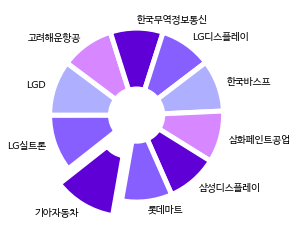

In [39]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') 
import matplotlib.pyplot as plt
import pandas as pd


similar_doc = model0.docvecs.most_similar('LG')
a=pd.DataFrame(similar_doc)
print(a)

ratio = a[1]
labels = a[0]
colors = ['#5f00d7', '#875fff', '#afafff', '#d787ff']
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
explode = [0.2, 0.0,0,0,0,0,0,0,0,0]

plt.pie(ratio, labels=labels,  startangle=260, counterclock=False,colors=colors,wedgeprops=wedgeprops,explode =explode)
plt.show()

이 외에 다른 테스트에서도 관련 업종의 회사들이 나오는 것을 확인할 수 있었습니다.



자소서 경험컬럼의 유사도 

              0         1
0         SKC&C  0.374936
1        한국전력공사  0.354412
2        CJ헬로비전  0.352360
3     CJ올리브네트웍스  0.352288
4         SK플래닛  0.350970
5        SK텔레시스  0.348358
6            티몬  0.345765
7  스마일게이트엔터테인먼트  0.343128
8           빙그레  0.328833
9      KB데이타시스템  0.328309


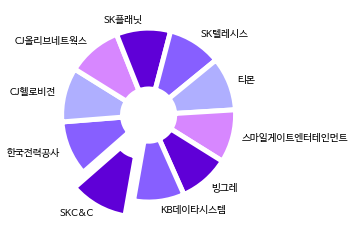

In [41]:
similar_doc = model1.docvecs.most_similar('엔씨소프트')
a=pd.DataFrame(similar_doc)
print(a)

ratio = a[1]
labels = a[0]
colors = ['#5f00d7', '#875fff', '#afafff', '#d787ff']
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
explode = [0.2, 0.0,0,0,0,0,0,0,0,0]


plt.pie(ratio, labels=labels,  startangle=260, counterclock=False,colors=colors,wedgeprops=wedgeprops,explode =explode)
plt.show()


직무 컬럼의 유사한 기업

          0         1
0      롯데슈퍼  0.551477
1     SK텔레콤  0.490759
2     국가정보원  0.434136
3     SK케미칼  0.410117
4  한국해양진흥공사  0.408421
5     LG이노텍  0.404888
6   마이다스아이티  0.403584
7     엔씨소프트  0.402559
8     SKC&C  0.399465
9   한국수자원공사  0.390674


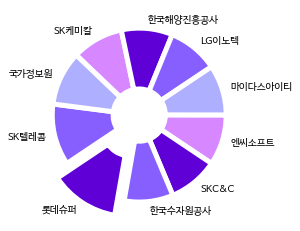

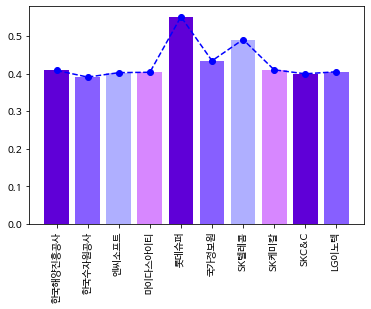

In [59]:
similar_doc = model3.docvecs.most_similar('KT')
a=pd.DataFrame(similar_doc)
print(a)

ratio = a[1]
labels = a[0]
colors = ['#5f00d7', '#875fff', '#afafff', '#d787ff']
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
explode = [0.2, 0.0,0,0,0,0,0,0,0,0]


plt.pie(ratio, labels=labels,  startangle=260, counterclock=False,colors=colors,wedgeprops=wedgeprops,explode =explode)
plt.show()
a.sort_values(0, ascending=False, inplace=True)

import matplotlib.pyplot as plt
import numpy as np
plt.bar(a[0], a[1], color=colors)
plt.xticks( a[0],rotation=90)
xtick_label_position = list(range(len(a[1])))
plt.plot(xtick_label_position, a[1], color='b',
         linestyle='--', marker='o') ## 선 그래프 출력
plt.show()

지원동기 커럼이 유사한 기업

        0         1
0   NC소프트  0.452051
1  넥슨네트웍스  0.420997
2   한화탈레스  0.414412
3   넥슨코리아  0.409528
4  롯데정보통신  0.404604
5   엔에이치엔  0.398553
6      KT  0.389146
7  현대오토에버  0.378904
8     넷마블  0.371232
9  롯데IT테크  0.365978


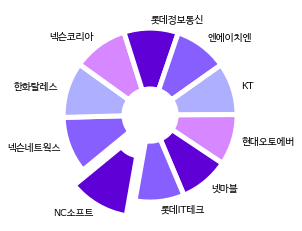

In [33]:
similar_doc = model0.docvecs.most_similar('엔씨소프트')
a=pd.DataFrame(similar_doc)
print(a)

ratio = a[1]
labels = a[0]
colors = ['#5f00d7', '#875fff', '#afafff', '#d787ff']
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
explode = [0.2, 0.0,0,0,0,0,0,0,0,0]


plt.pie(ratio, labels=labels,  startangle=260, counterclock=False,colors=colors,wedgeprops=wedgeprops,explode =explode)
plt.show()


In [ ]:
df_total['corp_nm'].value_counts().head(20)

삼성전자       2476
KT         1003
GS리테일       939
SK하이닉스      906
LG전자        805
현대자동차       745
LG디스플레이     600
CJ제일제당      571
현대모비스       513
한국전력공사      494
대한항공        474
LG화학        466
SK텔레콤       459
한국철도공사      458
한국수력원자력     382
SKC&C       379
농협은행        341
한국동서발전      334
CJ대한통운      324
코레일         310
Name: corp_nm, dtype: int64

         0         1
0  삼성디스플레이  0.450178
1  LG디스플레이  0.438779
2       삼송  0.407335
3   한국동서발전  0.405204
4     현대위아  0.402573
5    현대자동차  0.400404
6     삼성전기  0.397363
7    삼성SDI  0.392520
8      KCC  0.389618
9    포스코건설  0.388019


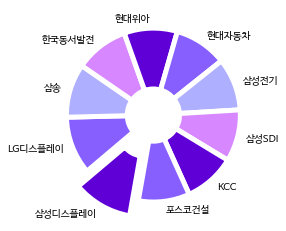

In [35]:
similar_doc = model0.docvecs.most_similar('삼성전자')
a=pd.DataFrame(similar_doc)
print(a)

ratio = a[1]
labels = a[0]
colors = ['#5f00d7', '#875fff', '#afafff', '#d787ff']
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
explode = [0.2, 0.0,0,0,0,0,0,0,0,0]


plt.pie(ratio, labels=labels,  startangle=260, counterclock=False,colors=colors,wedgeprops=wedgeprops,explode =explode)
plt.show()


In [69]:
similar_doc = model3.docvecs.most_similar('홈플러스')
a=pd.DataFrame(similar_doc)
a

,0,1
0,도드람양돈농협,0.316626
1,화성시공공기관,0.307677
2,엔씨소프트,0.307609
3,금호터미널,0.306519
4,아모레퍼시픽,0.298437
5,IBK기업은행,0.293339
6,롯데슈퍼,0.292524
7,클리오,0.291134
8,KT,0.290420
9,제일파마홀딩스,0.290239


         0         1
0  도드람양돈농협  0.316626
1  화성시공공기관  0.307677
2    엔씨소프트  0.307609
3    금호터미널  0.306519
4   아모레퍼시픽  0.298437
5  IBK기업은행  0.293339
6     롯데슈퍼  0.292524
7      클리오  0.291134
8       KT  0.290420
9  제일파마홀딩스  0.290239


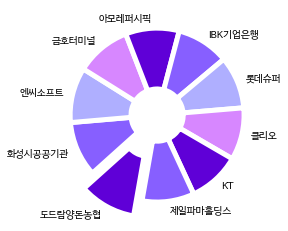

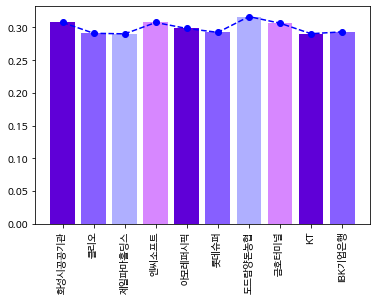

In [70]:
similar_doc = model3.docvecs.most_similar('홈플러스')
a=pd.DataFrame(similar_doc)
print(a)

ratio = a[1]
labels = a[0]
colors = ['#5f00d7', '#875fff', '#afafff', '#d787ff']
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
explode = [0.2, 0.0,0,0,0,0,0,0,0,0]


plt.pie(ratio, labels=labels,  startangle=260, counterclock=False,colors=colors,wedgeprops=wedgeprops,explode =explode)
plt.show()
a.sort_values(0, ascending=False, inplace=True)

import matplotlib.pyplot as plt
import numpy as np
plt.bar(a[0], a[1], color=colors)
plt.xticks( a[0],rotation=90)
xtick_label_position = list(range(len(a[1])))
plt.plot(xtick_label_position, a[1], color='b',
         linestyle='--', marker='o') ## 선 그래프 출력
plt.show()

유통쪽관련 기업들과 지원동기 항목이 유사한듯

In [65]:
similar_doc = model0.docvecs.most_similar('대한항공')
a=pd.DataFrame(similar_doc)
a


,0,1
0,아시아나항공,0.532547
1,진에어,0.452760
2,티웨이항공,0.426210
3,에어부산,0.425340
4,KT,0.422132
5,이스타항공,0.411413
6,금호아시아나,0.411128
7,아시아나IDT,0.391079
8,스위스포트코리아,0.388326
9,금호건설,0.379149


          0         1
0    아시아나항공  0.532547
1       진에어  0.452760
2     티웨이항공  0.426210
3      에어부산  0.425340
4        KT  0.422132
5     이스타항공  0.411413
6    금호아시아나  0.411128
7   아시아나IDT  0.391079
8  스위스포트코리아  0.388326
9      금호건설  0.379149


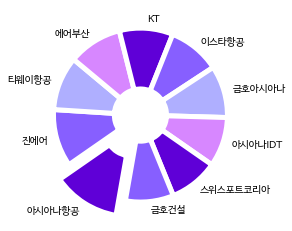

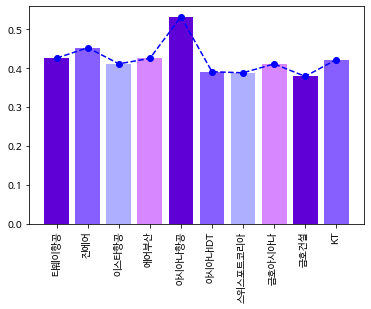

In [63]:
similar_doc = model0.docvecs.most_similar('대한항공')
a=pd.DataFrame(similar_doc)
print(a)

ratio = a[1]
labels = a[0]
colors = ['#5f00d7', '#875fff', '#afafff', '#d787ff']
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
explode = [0.2, 0.0,0,0,0,0,0,0,0,0]


plt.pie(ratio, labels=labels,  startangle=260, counterclock=False,colors=colors,wedgeprops=wedgeprops,explode =explode)
plt.show()
a.sort_values(0, ascending=False, inplace=True)

import matplotlib.pyplot as plt
import numpy as np
plt.bar(a[0], a[1], color=colors)
plt.xticks( a[0],rotation=90)
xtick_label_position = list(range(len(a[1])))
plt.plot(xtick_label_position, a[1], color='b',
         linestyle='--', marker='o') ## 선 그래프 출력
plt.show()

항공사들과 지원동기가 유사한듯 보인다

모델 로드